Data shape: (10000, 2)
Labels shape: (10000,)


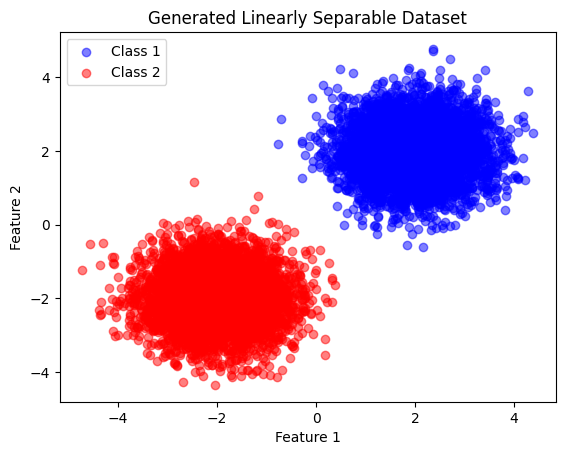

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Define means and covariance matrix
mean1 = [2, 2]
mean2 = [-2, -2]
cov = 0.5 * np.eye(2)

# Generate data
class1 = np.random.multivariate_normal(mean1, cov, 5000)
class2 = np.random.multivariate_normal(mean2, cov, 5000)

# Combine data and create labels
data = np.vstack((class1, class2))
labels = np.hstack((np.ones(5000), -1 * np.ones(5000)))

shuffel_idx = np.random.permutation(len(labels))
data = data[shuffel_idx]
labels = labels[shuffel_idx]
# Check the shape of data
print("Data shape:", data.shape)  # Should be (10000, 2)
print("Labels shape:", labels.shape)  # Should be (10000,)

# Plot data
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1', alpha=0.5)
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2', alpha=0.5)
plt.legend()
plt.title("Generated Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [6]:
data

array([[ 2.35122995,  1.90223238],
       [ 2.45798496,  3.07694474],
       [ 1.83442856,  1.83444017],
       ...,
       [-1.32641679, -1.72576466],
       [-1.02605475, -1.73246334],
       [-0.78835151, -3.14545628]])

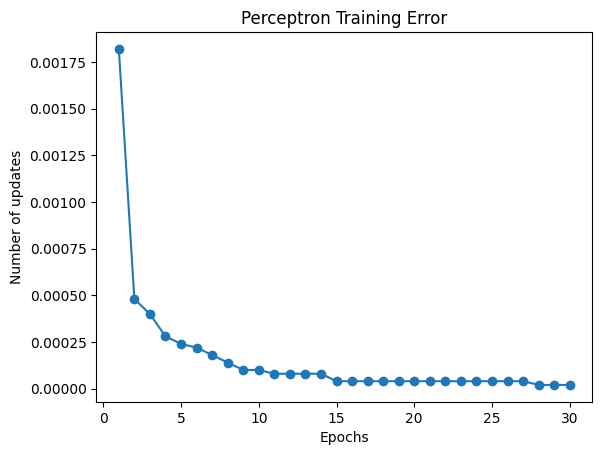

In [3]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=50):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # Initialize weights with small random values
        self.weights = np.random.rand(X.shape[1] + 1) * 0.01
        self.errors = []
        
        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += abs(update)
            self.errors.append(error)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Train the Perceptron
perceptron = Perceptron(learning_rate=0.00001, n_iter=30)
perceptron.fit(data, labels)

# Plot the training error
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron Training Error')
plt.show()


In [8]:
data

array([[ 2.35122995,  1.90223238],
       [ 2.45798496,  3.07694474],
       [ 1.83442856,  1.83444017],
       ...,
       [-1.32641679, -1.72576466],
       [-1.02605475, -1.73246334],
       [-0.78835151, -3.14545628]])

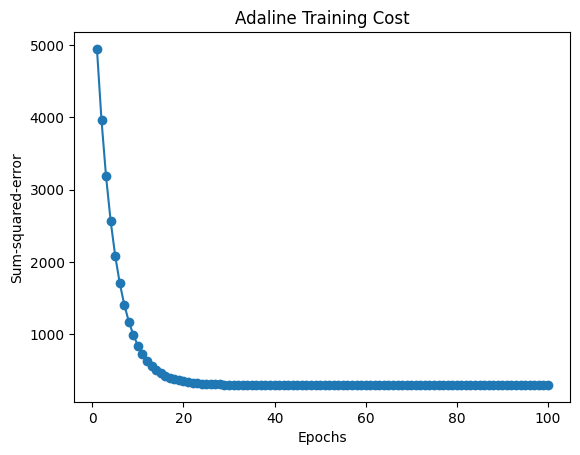

295.85766908780516

In [6]:
class Adaline:
    def __init__(self, learning_rate=0.01, n_iter=50):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # Initialize weights with small random values
        self.weights = np.random.rand(X.shape[1] + 1) * 0.01
        self.cost = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Train the Adaline
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

adaline = Adaline(learning_rate=0.0001, n_iter=100)
adaline.fit(data_std, labels)

# Plot the training cost
plt.plot(range(1, len(adaline.cost) + 1), adaline.cost, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline Training Cost')
plt.show()
adaline.cost[-1]


In [7]:
import numpy as np
import matplotlib.pyplot as plt 

from matplotlib.colors import ListedColormap

""" Function to color the deciosion regions """
def plot_decision_regions(X, y, classifier, resolution = 0.02):

	# setup marker generator and color map

	markers = ('s', 'x', 'o', '^', 'v')
	colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
	cmap = ListedColormap(colors[ : len(np.unique(y))])

	# plot the decision surface

	x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
	x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
	xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
		np.arange(x2_min, x2_max, resolution))

	z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
	Z = z.reshape(xx1.shape)

	plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
	plt.xlim(xx1.min(), xx1.max())
	plt.ylim(xx2.min(), xx2.max())

	# plot class samples

	for idx, cl in enumerate(np.unique(y)):
		plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
			alpha = 0.8, c = cmap(idx), marker = markers[idx],
			label = cl)
